> # 3.5  Feature Selection ⛏️

#### Why Feature Selection?

- To reduce overfitting or simply speed up your model.
- Improves the accuracy of our model
- High-dimensional dataset has a lot of features and it can make our model very complicated

- If we add these irrelevant features in the model, it will just make the model worst (Garbage In Garbage Out).

> Many models, especially those based on regression slopes and intercepts, will estimate parameters for every term in the model. Because of this, the presence of non-informative variables can add uncertainty to the predictions and reduce the overall effectiveness of the model.
>
>   — _Kuhn M., Johnson K., **Applied Predictive Modeling**, Page 488, 2013._

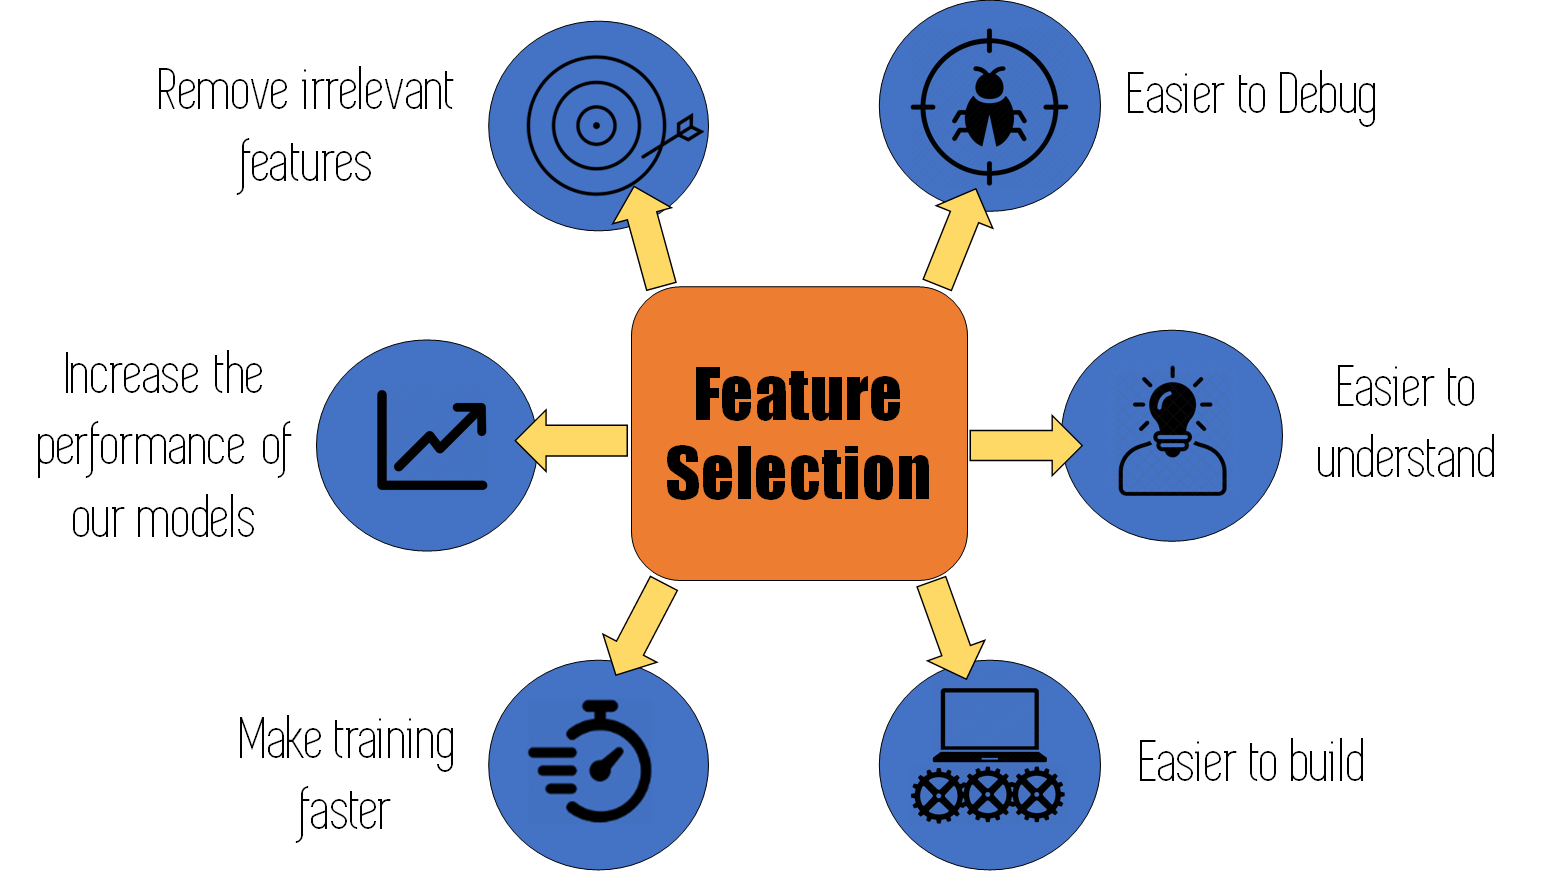

#### The main benefits of performing feature selection in advance, rather than letting the machine learning model figure out which features are most important, include:

* simpler models: simple models are easy to explain - a model that is too complex and unexplainable is not valuable
* shorter training times: a more precise subset of features decreases the amount of time needed to train a model
* variance reduction: increase the precision of the estimates that can be obtained for a given simulation 
* avoid the curse of high dimensionality: dimensionally cursed phenomena states that, as dimensionality and the number of features increases, the volume of space increases so fast that the available data become limited - PCA feature selection may be used to reduce dimensionality 

# Feature Selection Methods 












# Let's start!

In [1]:
# Import the usual packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import the relevant sklearn packages
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.api import OLS, add_constant
from sklearn.datasets import fetch_california_housing

# Set the figure size of matplotlib plots to (12,6)
plt.rcParams['figure.figsize'] = (15,6)

## Load the Data

In [2]:
california = fetch_california_housing()
print(california['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
california

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------

In [4]:
# create X and y
X = pd.DataFrame(california['data'], columns = california['feature_names'])
y = pd.Series(california['target'])

X.shape, y.shape

((20640, 8), (20640,))

In [5]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [6]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Length: 20640, dtype: float64

#### Train-Test-Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 1. Filter Methods




- The filter method uses the principal criteria of ranking technique and uses the rank ordering method for variable selection. The reason for using the ranking method is simplicity, produce excellent and relevant features. The ranking method will filter out irrelevant features before classification process starts.

- Some examples of some filter methods include the Chi-squared test, Information gain, and Correlation coefficient scores.






## 1.1  Correlation Coefficient



- Correlation is a measure of the linear relationship of 2 or more variables.
- The logic behind using correlation for feature selection is that the good variables are highly correlated with the target. Furthermore, variables should be correlated with the target but should be uncorrelated among themselves.

<AxesSubplot:>

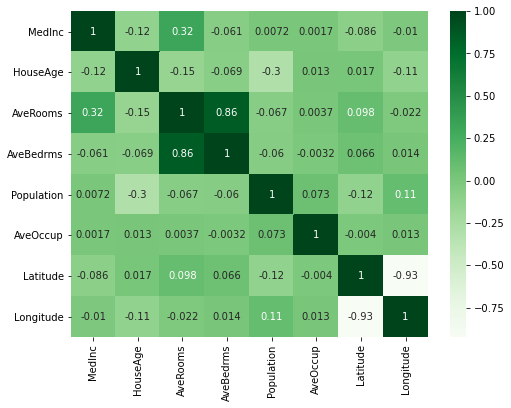

In [8]:
ax = plt.figure(figsize=(8,6))
pearsoncorr = X_train.corr(method='pearson')
sns.heatmap(pearsoncorr, xticklabels = pearsoncorr.columns, yticklabels=pearsoncorr.columns,
            cmap = 'Greens', annot=True)

### The correlation coefficient has values between -1 to 1
- A value closer to 0 implies weaker correlation (exact 0 implying no correlation)
- A value closer to 1 implies stronger positive correlation
- A value closer to -1 implies stronger negative correlation


**Advantages:**

- Fast, easy

**Disadvantages:**


- There is not really sensible cutoff value
- Cannot sensibly be calculated for categorical variables



## 1.2 Variance Inflation Factor

- Variance Inflation Factor (VIF) is used to detect the presence of multicollinearity. 

- Variance inflation factors (VIF) measure how much the variance of the estimated regression coefficients are inflated as compared to when the predictor variables are not linearly related.
It is obtained by regressing each independent variable, say X on the remaining independent variables (say Y)  and checking how much of it (of X) is explained by these variables.
- If your VIF is between 5-10 mostly multicolinearity is present and you should consider dropping off the variable

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import add_constant 

In [10]:
X_vif = add_constant(X) 

X_vif

,const,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,1.0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,1.0,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,1.0,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,1.0,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,1.0,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...,...
20635,1.0,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,1.0,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.0,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.0,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [11]:
pd.Series([variance_inflation_factor(X_vif.values, i) 
            for i in range(X_vif.shape[1])], 
            index=X_vif.columns)

const         17082.623698
MedInc            2.501295
HouseAge          1.241254
AveRooms          8.342786
AveBedrms         6.994995
Population        1.138125
AveOccup          1.008324
Latitude          9.297624
Longitude         8.962263
dtype: float64

**Advantages:**

- Takes into account that multivariate dependencies and therefore better captures redundancies

**Disadvantages:**

- It too does not have a clearly defined cutoff value

- Inspect the factors for each predictor variable, if the VIF is between 5–10, multicollinearity is likely present and you should consider dropping the variable.



## 2. Wrapper Methods


- Wrapper method needs one machine learning algorithm and uses its performance as evaluation criteria. This method searches for a feature which is best-suited for the machine learning algorithm and aims to improve the mining performance. To evaluate the features, the predictive accuracy used for classification tasks and goodness of cluster is evaluated using clustering.

- Some typical examples of wrapper methods are Forward feature selection, Backward feature elimination, Recursive feature elimination, etc.





### 2.1. Select significant features

- Here we are using OLS method which stands for “Ordinary Least Squares”.  
- Method estimates the relationship by minimizing sum of the the squares in difference  between observed and predicted values.
- This model is used for performing linear regression.


In [12]:
m = OLS(y_train, add_constant(X_train)) #Adding constant column, mandatory for sm.OLS method

In [13]:
m_result = m.fit()

In [14]:
print(m_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     3037.
Date:                Thu, 09 Sep 2021   Prob (F-statistic):               0.00
Time:                        10:26:31   Log-Likelihood:                -16892.
No. Observations:               15480   AIC:                         3.380e+04
Df Residuals:                   15471   BIC:                         3.387e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.6096      0.759    -48.206      0.0

In [15]:
m_result.rsquared_adj   # It penalizes for adding unnecessary features and allows a comparison of regression models
                        # R2 adjusted  adjust the statistic based on the number of independent variables

0.6107622020656502

#### Find the features with the lowest p-value , lower than 0.05

* In forward selection, we start with a null model and then start fitting the model with each individual feature one at a time and select the feature with the minimum p-value. 

In [16]:
# Create a list of features
forward_features = []

# Original features
feature_list = X_train.columns

In [17]:
feature_list

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [18]:
possible_models = pd.DataFrame(columns=['features', 'p', 'adj_r2'])
# Run a linear regression separately on each of the features

while len(feature_list) > 0:
    forward_selection = pd.DataFrame(columns=['features', 'p', 'adj_r2'])
    for feature in feature_list:
        m_feature = OLS(y_train, X_train[forward_features + [feature]])
        result = m_feature.fit()
        forward_selection = forward_selection.append({
                                    'feature': feature
                                  , 'features': forward_features + [feature]
                                  , 'p': result.pvalues.loc[feature]
                                  , 'adj_r2': result.rsquared_adj}
                                  , ignore_index=True)

    if forward_selection.sort_values('p').iloc[0].p < 0.05:
        print(forward_selection.sort_values('p').iloc[0].features)
        best_feature = forward_selection.sort_values('p').iloc[0].feature
        forward_features.append(best_feature)
        feature_list = feature_list.drop(best_feature)
        best_model = forward_selection[forward_selection['feature']==best_feature]
        possible_models = possible_models.append(best_model, ignore_index=True)

    else:
        break

['MedInc']
['MedInc', 'HouseAge']
['MedInc', 'HouseAge', 'AveRooms']
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms']
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Latitude']
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Latitude', 'Longitude']
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Latitude', 'Longitude', 'AveOccup']


In [19]:
forward_features

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Latitude',
 'Longitude',
 'AveOccup']

In [20]:
feature_list

Index(['Population'], dtype='object')

In [21]:
forward_selection

,features,p,adj_r2,feature
0,"[MedInc, HouseAge, AveRooms, AveBedrms, Latitu...",0.388527,0.894012,Population


In [22]:
possible_models

,features,p,adj_r2,feature
0,[MedInc],0.000000e+00,0.870516,MedInc
1,"[MedInc, HouseAge]",0.000000e+00,0.885436,HouseAge
2,"[MedInc, HouseAge, AveRooms]",1.020918e-25,0.886239,AveRooms
3,"[MedInc, HouseAge, AveRooms, AveBedrms]",1.101833e-136,0.890694,AveBedrms
4,"[MedInc, HouseAge, AveRooms, AveBedrms, Latitude]",1.386967e-63,0.892671,Latitude
5,"[MedInc, HouseAge, AveRooms, AveBedrms, Latitu...",6.101757e-36,0.893745,Longitude
6,"[MedInc, HouseAge, AveRooms, AveBedrms, Latitu...",2.295739e-10,0.894014,AveOccup


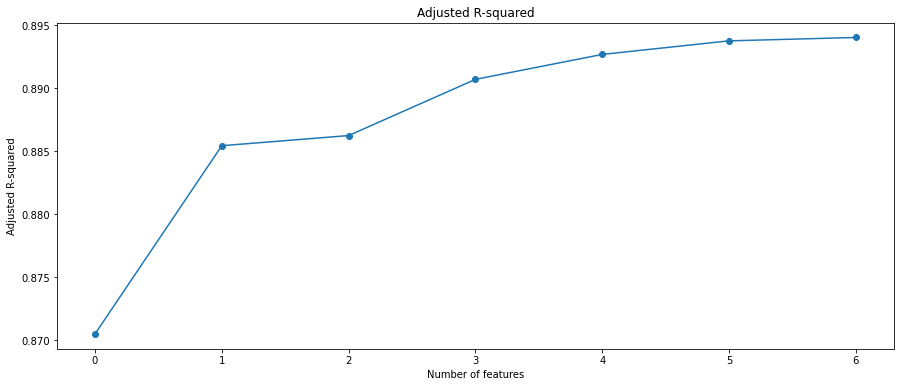

In [23]:
possible_models['adj_r2'].plot(marker="o")
plt.title('Adjusted R-squared')
plt.xlabel('Number of features')
plt.ylabel('Adjusted R-squared')
plt.show()

## 2.3 Use RF Feature Importance

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [24]:
from sklearn.ensemble import RandomForestRegressor

In [25]:
rf = RandomForestRegressor(max_depth=5, random_state=0)

In [26]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [27]:
pd.DataFrame({'importance': rf.feature_importances_, 'feature': X_train.columns}).\
sort_values('importance', ascending=False)   #feature_importance- use for RF model

,importance,feature
0,0.759017,MedInc
5,0.132917,AveOccup
1,0.048422,HouseAge
2,0.023461,AveRooms
6,0.021468,Latitude
7,0.010694,Longitude
4,0.002758,Population
3,0.001263,AveBedrms


## 2.4 Recursive Feature Elimination

- The Recursive Feature Elimination (RFE) method removes attributes and builds a model on those attributes that remain. 
- It uses accuracy metric to rank the feature according to their importance. 
- The RFE method takes the model to be used and the number of required features as input. It then gives the ranking of all the variables, 1 being most important. 
- It also gives its support, True being relevant feature and False being irrelevant feature.

In [28]:
from sklearn.feature_selection import RFE

In [29]:
m_sl = LinearRegression()        
m_sl.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
rfe = RFE(m_sl)    #use for other regression models
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=None, step=1, verbose=0)

In [31]:
rfe.support_  # booleans indicating features to include

array([ True, False, False,  True, False, False,  True,  True])

In [32]:
X_train.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [33]:
rfe.ranking_  # integers indicating importance

array([1, 3, 2, 1, 5, 4, 1, 1])

In [34]:
rfe.score(X_train, y_train), m_sl.score(X_train, y_train)

(0.5936128319114663, 0.6109633715458151)

In [35]:
# Try cross validation
from sklearn.model_selection import cross_val_score

In [36]:
cross_val_score(m_sl, X_train, y_train).mean()

0.6063463654891548

In [37]:

cross_val_score(rfe, X_train, y_train).mean()

0.5925834630234112

## 3. **Embedded Methods**


- Embedded methods are iterative in a sense that takes care of each iteration of the model training process and carefully extract those features which contribute the most to the training for a particular iteration. Regularization methods are the most commonly used embedded methods which penalize a feature given a coefficient threshold.


### 3.1 Regularization

- Regularization adds a penalty to the different parameters of the machine learning model to avoid overfitting.
- Lasso or L1 has the property that is able to shrink some of the coefficients to zero.


In [38]:
from sklearn.linear_model import Lasso

In [39]:
l = Lasso()

In [40]:
l.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [41]:
pd.DataFrame({'feature': X_train.columns, 'coefficient': l.coef_}).\
sort_values('coefficient')

,feature,coefficient
4,Population,-0.000007
2,AveRooms,0.000000
3,AveBedrms,-0.000000
5,AveOccup,-0.000000
6,Latitude,-0.000000
7,Longitude,-0.000000
1,HouseAge,0.005897
0,MedInc,0.148930


# Conclusion:



- Filter method is less accurate. It is great while doing EDA, it can also be used for checking multi co-linearity in data.
- Wrapper and Embedded methods give more accurate results but as they are computationally expensive, these method are suited when you have lesser features (~20).